In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from scipy.stats import probplot
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Load

In [2]:
# Load the Boston dataset
boston = load_boston()

# Convert the data into a Pandas DataFrame
df_housing_3 = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add the target variable to the DataFrame
df_housing_3['target'] = boston.target

# Print the first few rows of the DataFrame
print(df_housing_3.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


## Exploratory Data Analysis

In [3]:
# Checking shape of dataset
df_housing_3.shape

(506, 14)

In [4]:
# Getting info of the dataset
df_housing_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# Checking number of columns in the dataset
df_housing_3.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [6]:
# Description of the dataset
df_housing_3.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
# Checking for null values
df_housing_3.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

## Data Visualizing

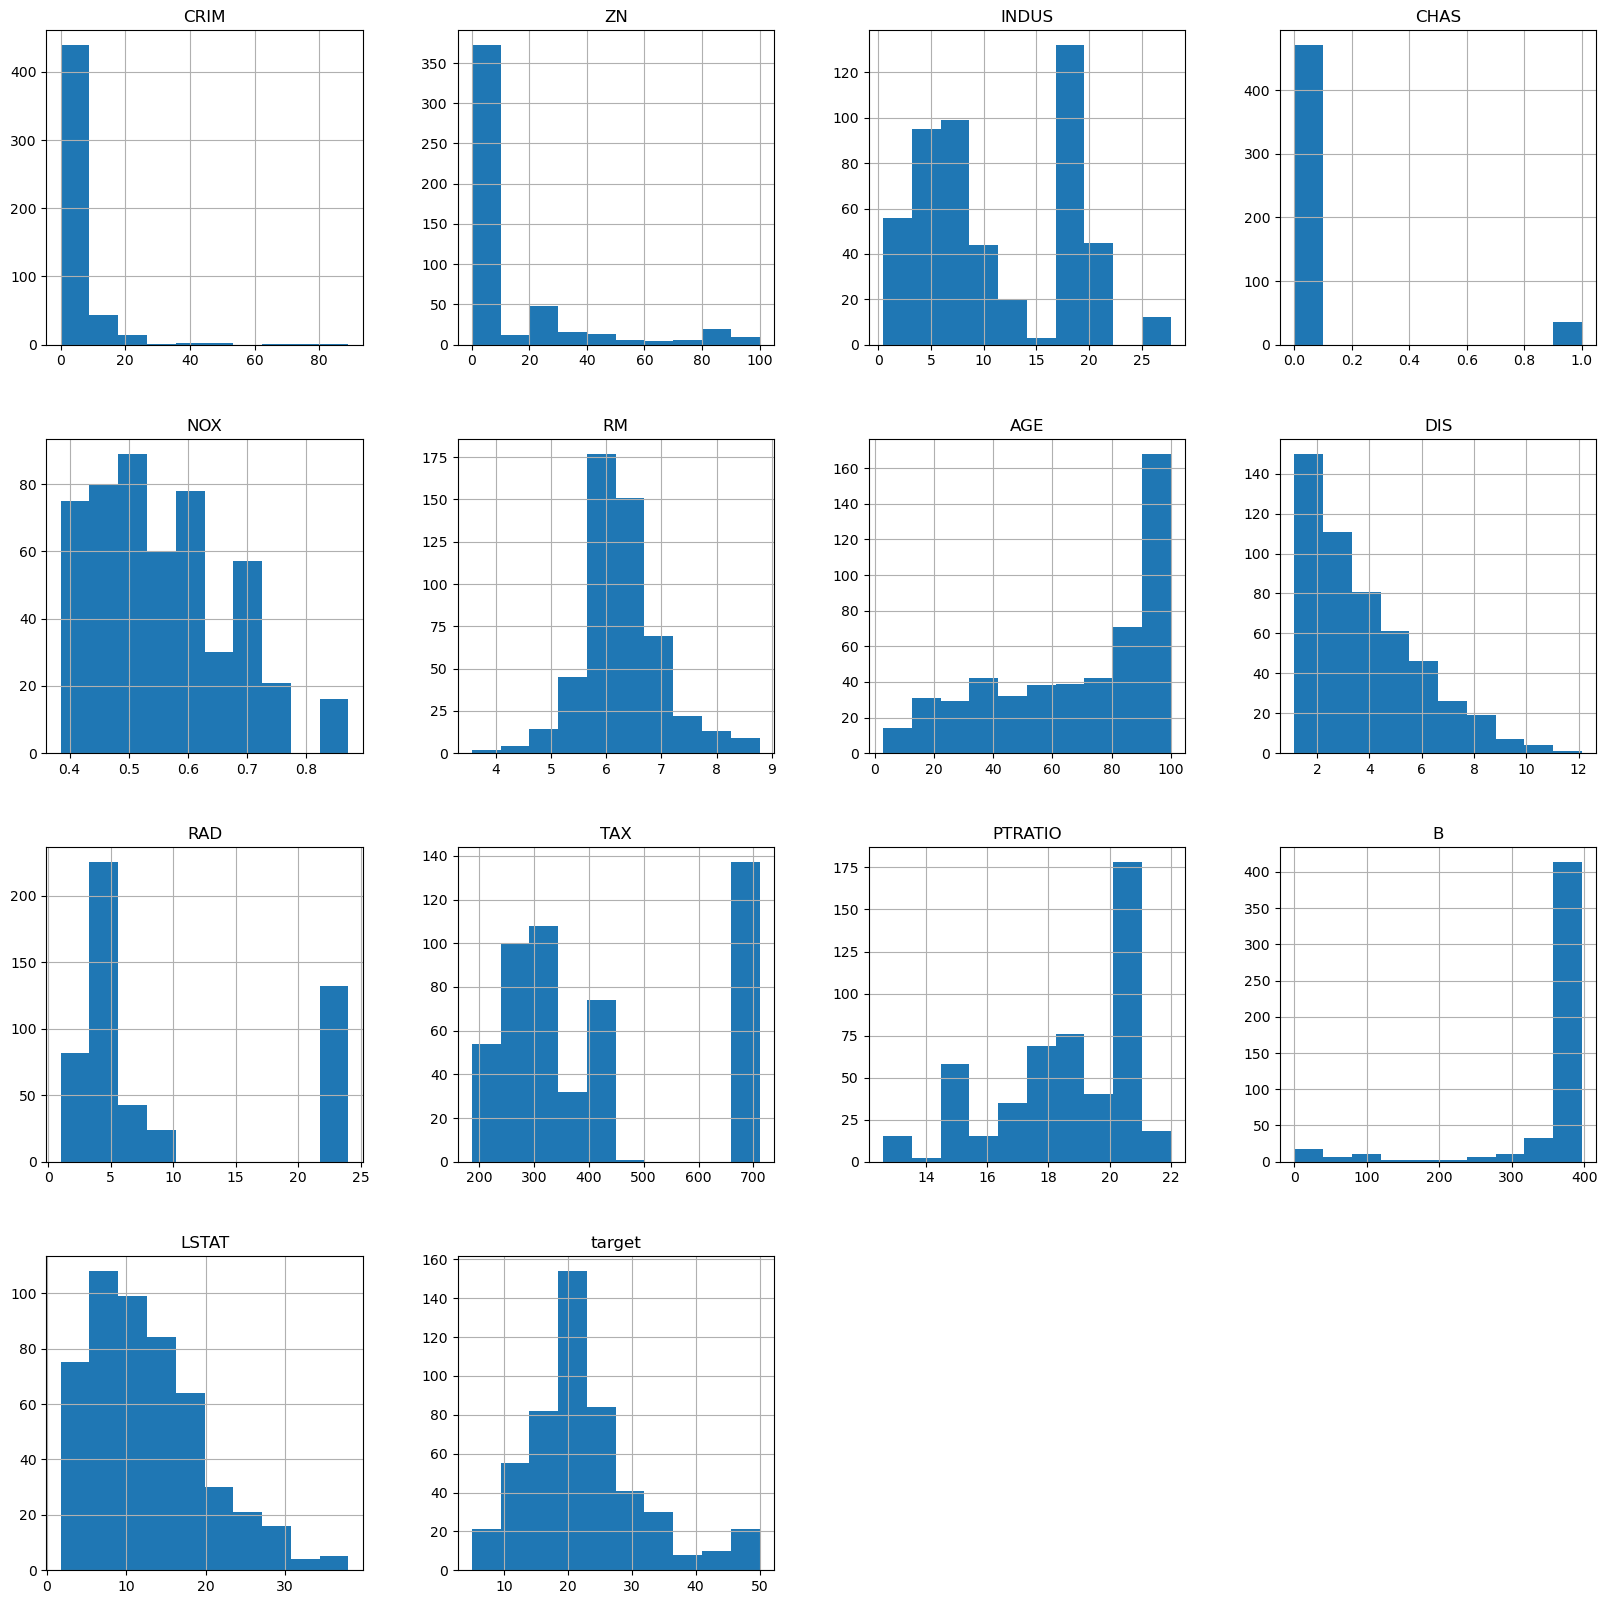

In [8]:
# Histograms of each feature to understand their distributions
df_housing_3.hist(figsize=(20, 20))
plt.show()


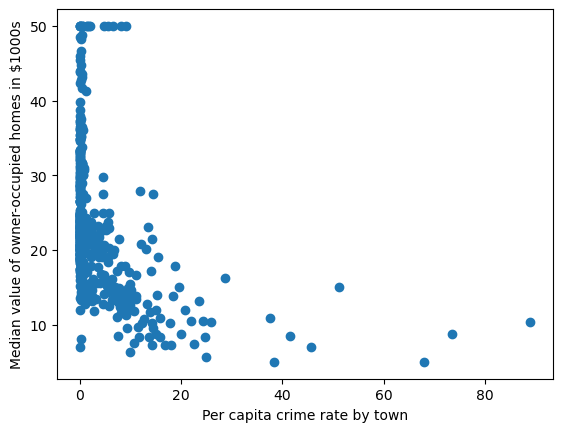

In [9]:
# Scatter plots to visualize the relationships between features and target variable
plt.scatter(df_housing_3['CRIM'], df_housing_3['target'])
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

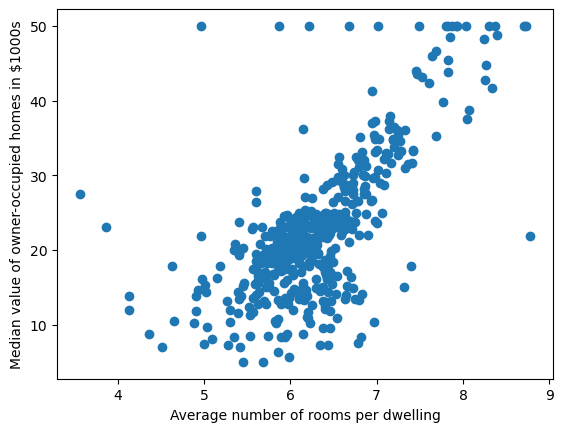

In [10]:
# Scatter plots to visualize the relationships between features and target variable
plt.scatter(df_housing_3['RM'], df_housing_3['target'])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

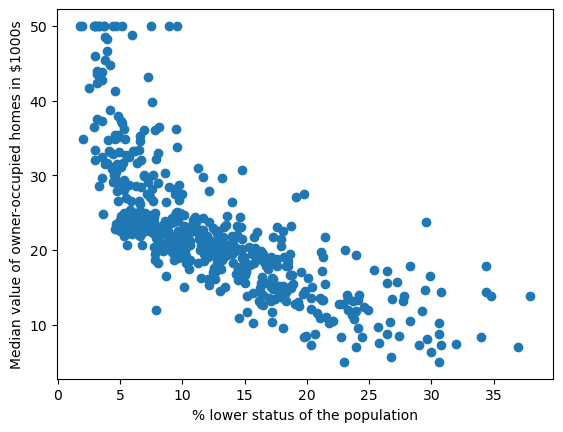

In [11]:
# Scatter plots to visualize the relationships between features and target variable
plt.scatter(df_housing_3['LSTAT'], df_housing_3['target'])
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

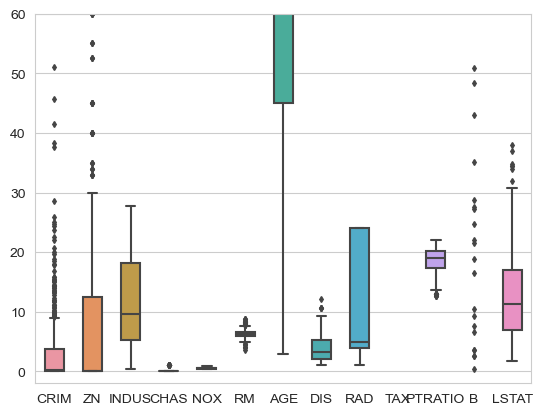

In [12]:
# Extracting the column names of the DataFrame containing the features
feature_names = df_housing_3.columns[:-1] # Exclude the target variable

# Create a boxplot for each feature with same y-axis limits
sns.set_style("whitegrid")
sns.boxplot(data=df_housing_3[feature_names], width=0.5, fliersize=3)
plt.ylim([-2, 60])

# Show the plot
plt.show()

In [13]:
# Select features to be transformed
skewed_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Apply Box-Cox transformation to the selected features
for feature in skewed_features:
    # the second output from boxcox is not needed here
    df_housing_3[feature], _ = boxcox(df_housing_3[feature] + 1)  

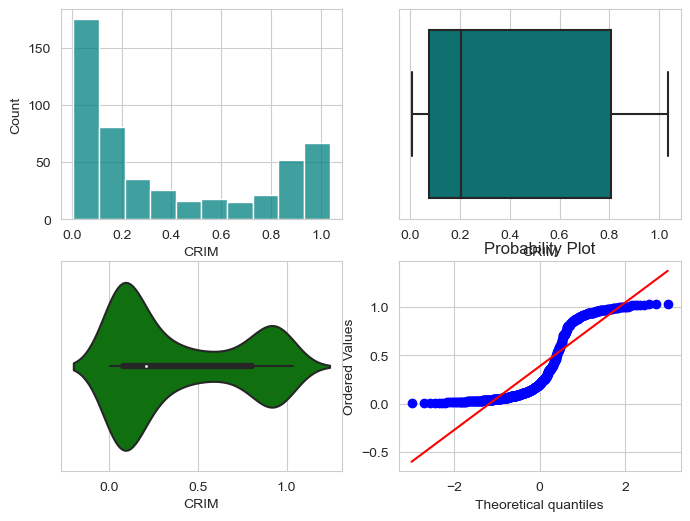

In [14]:
# Exploring Numerical variable CRIM

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(8,6))

# Create a histogram of the 'Rent' column
ax1 = sns.histplot(x=df_housing_3['CRIM'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'Rent' column
ax2 = sns.boxplot(x=df_housing_3['CRIM'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'Rent' column
ax3 = sns.violinplot(x=df_housing_3['CRIM'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'Rent' column
ax4 = probplot(df_housing_3['CRIM'], plot=plt)

# Show the plots
plt.show()

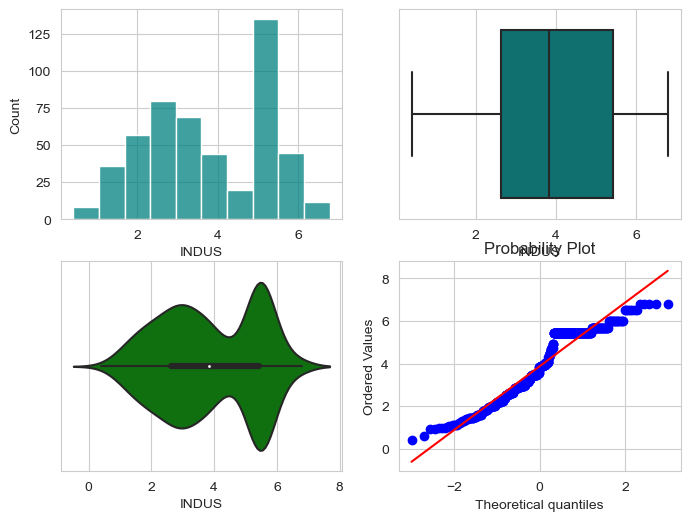

In [15]:
# Exploring Numerical variable INDUS

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(8,6))

# Create a histogram of the 'Rent' column
ax1 = sns.histplot(x=df_housing_3['INDUS'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'Rent' column
ax2 = sns.boxplot(x=df_housing_3['INDUS'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'Rent' column
ax3 = sns.violinplot(x=df_housing_3['INDUS'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'Rent' column
ax4 = probplot(df_housing_3['INDUS'], plot=plt)

# Show the plots
plt.show()

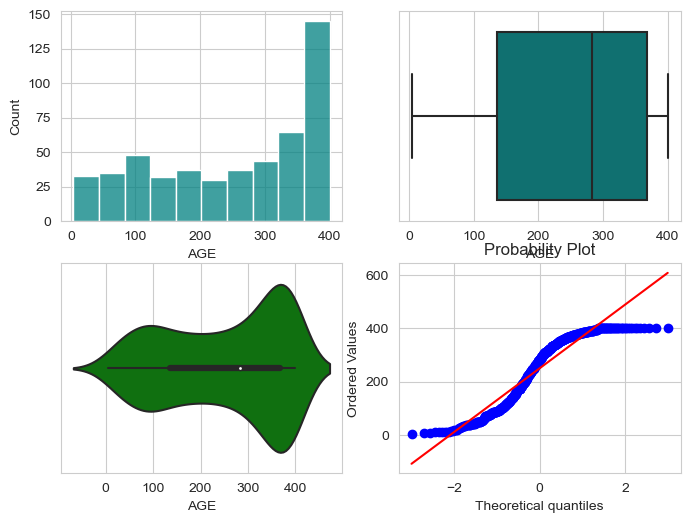

In [16]:
# Exploring Numerical variable AGE

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(8,6))

# Create a histogram of the 'Rent' column
ax1 = sns.histplot(x=df_housing_3['AGE'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'Rent' column
ax2 = sns.boxplot(x=df_housing_3['AGE'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'Rent' column
ax3 = sns.violinplot(x=df_housing_3['AGE'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'Rent' column
ax4 = probplot(df_housing_3['AGE'], plot=plt)

# Show the plots
plt.show()

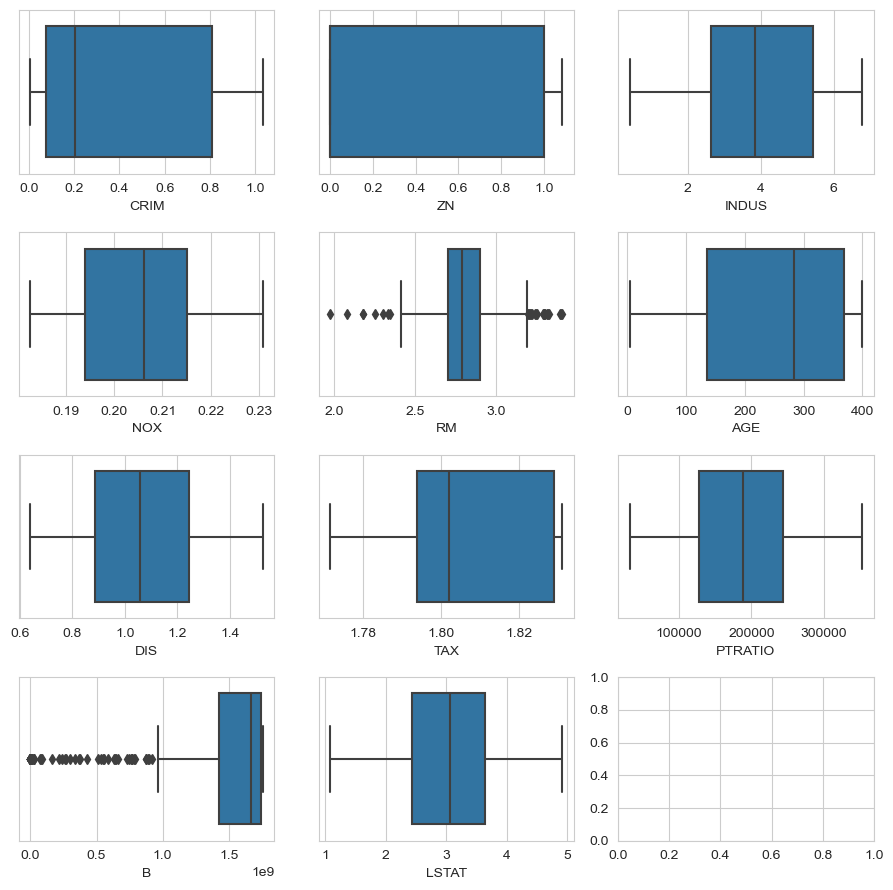

In [17]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9,9))

# Loop through each feature and create a boxplot
for i, feature in enumerate(df_housing_3[skewed_features].columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df_housing_3[feature], ax=axes[row, col])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

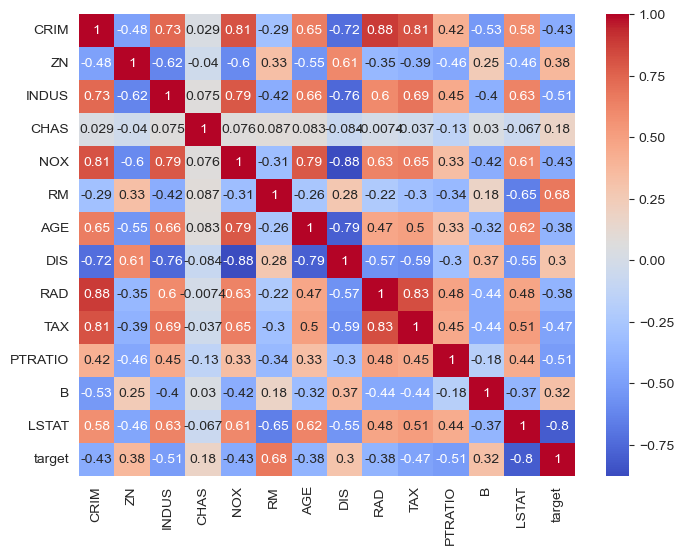

In [18]:
# Heatmap to visualize the correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(df_housing_3.corr(),annot=True,cmap='coolwarm')
plt.show()

In [19]:
# Correlation matrix
corr = df_housing_3.corr()

# Finding the most highly correlated features
high_corr = corr['target'].sort_values(ascending=False)[:7]
print("Most highly correlated features:")
print(high_corr)

# Finding the most weakly correlated features
low_corr = corr['target'].sort_values(ascending=True)[:7]
print("\nMost weakly correlated features:")
print(low_corr)

Most highly correlated features:
target    1.000000
RM        0.676939
ZN        0.375807
B         0.324452
DIS       0.296892
CHAS      0.175260
RAD      -0.381626
Name: target, dtype: float64

Most weakly correlated features:
LSTAT     -0.803443
PTRATIO   -0.511193
INDUS     -0.509471
TAX       -0.473259
NOX       -0.429656
CRIM      -0.428917
AGE       -0.384326
Name: target, dtype: float64


## Train Test Split

In [20]:
# Defining input features

X = df_housing_3.drop(['target'], axis= 'columns')
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006281,1.027774,1.514756,0.0,0.206166,2.890683,224.200319,1.154678,1.0,1.796859,73458.962923,1.757992e+09,2.058391
1,0.026600,0.000000,3.183963,0.0,0.197065,2.850510,290.105355,1.228591,2.0,1.786454,140762.652198,1.757992e+09,2.782521
2,0.026581,0.000000,3.183963,0.0,0.197065,3.044659,205.387503,1.228591,2.0,1.786454,140762.652198,1.691013e+09,1.833656
3,0.031378,0.000000,1.452155,0.0,0.195410,2.998295,139.321704,1.301378,3.0,1.781652,174199.594623,1.720399e+09,1.526384
4,0.064688,0.000000,1.452155,0.0,0.195410,3.035295,174.752022,1.301378,3.0,1.781652,174199.594623,1.757992e+09,2.133595


In [21]:
# Defining target variable
Y = df_housing_3.target
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [23]:
# Select columns to be scaled
cols_to_scale = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Perform scaling
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [24]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,-1.003866,-0.618506,-1.544078,-0.281546,-0.869346,0.177735,-0.462912,1.151364,-0.746179,-1.477116,-0.001125,0.528726,-1.155604
116,-0.759570,-0.618506,0.031067,-0.281546,0.090295,-0.178049,0.059205,-0.294743,-0.398464,0.449368,-0.432889,0.501697,0.166656
45,-0.675208,-0.618506,-0.463167,-0.281546,-0.996175,-0.894830,-1.291811,0.855321,-0.746179,-1.313445,-0.388405,0.621527,-0.115233
16,0.367369,-0.618506,-0.254747,-0.281546,0.005506,-0.523477,-1.422837,0.633188,-0.630274,-0.455168,1.470294,0.294476,-0.814968
468,1.638025,-0.618506,1.005330,-0.281546,0.381113,-0.536530,0.000564,-0.174350,1.687825,1.385286,0.892295,-0.238221,0.911115


In [25]:
X_train.shape

(354, 13)

In [26]:
X_test.shape

(152, 13)

## Decision Tree from Sklearn library

In [27]:
# Set the hyperparameters for the DecisionTreeRegressor
dt_params = {'criterion': 'squared_error', 'splitter': 'best'} 

# Train Decision Tree model
dt_clf = DecisionTreeRegressor(**dt_params, random_state=42)
dt_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
dt_score = dt_clf.score(X_test, Y_test)
print(f"Decision Tree R-squared score on test data: {dt_score}")

# Compute the predicted target values for the test dataset using the trained decision tree model
Y_pred = dt_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"Decision Tree MSE on test data: {mse:.2f}")
print(f"Decision Tree RMSE on test data: {rmse:.2f}")
print(f"Decision Tree MAE on test data: {mae:.2f}")

Decision Tree R-squared score on test data: 0.8436172098250776
Decision Tree MSE on test data: 11.65
Decision Tree RMSE on test data: 3.41
Decision Tree MAE on test data: 2.55


## K-Fold Cross Validation

In [28]:
# Create the decision tree model
dt = DecisionTreeRegressor(**dt_params)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Evaluate the decision tree model using cross-validation
scores = cross_val_score(dt, X, Y, cv=cv)

# Print the cross-validation scores
print("Decision Tree Cross-Validation Scores:", scores)
print("Mean R-squared:", scores.mean())

Decision Tree Cross-Validation Scores: [0.60495567 0.73714999 0.80768346 0.72988534 0.7863969 ]
Mean R-squared: 0.7332142746572263


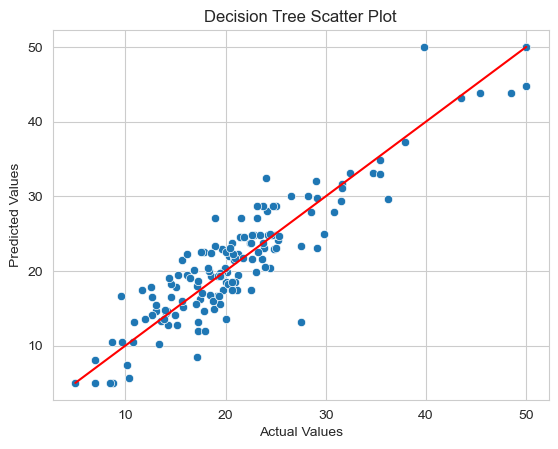

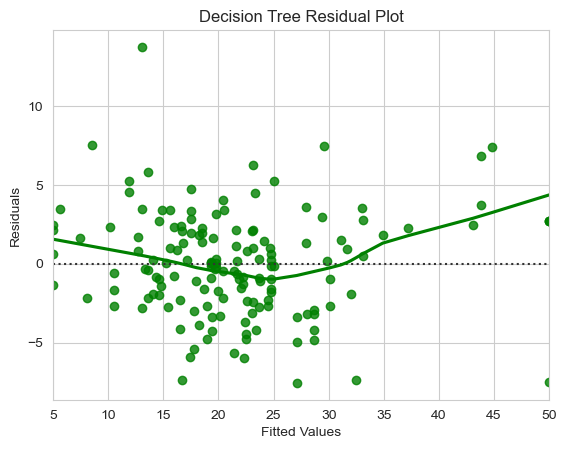

In [29]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('Decision Tree Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('Decision Tree Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Decision Tree from XGBoost library

In [41]:
# Set the hyperparameters for the XGBoost decision tree
xgb_params = {'booster': 'gbtree','objective': 'reg:squarederror','random_state': 42}

# Train XGBoost decision tree model
xgb_clf = XGBRegressor(**xgb_params)
xgb_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_score = xgb_clf.score(X_test, Y_test)
print(f"XGBoost Decision Tree R-squared score on test data: {xgb_score}")

# Compute the predicted target values for the test dataset using the trained XGBoost decision tree model
Y_pred = xgb_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost Decision Tree MSE on test data: {mse:.2f}")
print(f"XGBoost Decision Tree RMSE on test data: {rmse:.2f}")
print(f"XGBoost Decision Tree MAE on test data: {mae:.2f}")

XGBoost Decision Tree R-squared score on test data: 0.8710620378464169
XGBoost Decision Tree MSE on test data: 9.61
XGBoost Decision Tree RMSE on test data: 3.10
XGBoost Decision Tree MAE on test data: 2.10


## K-Fold Cross Validation 

In [42]:
# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost Decision Tree model using cross-validation
score = cross_val_score(xgb_clf, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Decision Tree Cross-Validation Scores:", score)
print("Mean R-squared:", score.mean())

XGBoost Decision Tree Cross-Validation Scores: [0.78471319 0.72913184 0.85543    0.88052288 0.86630768]
Mean R-squared: 0.8232211166221134


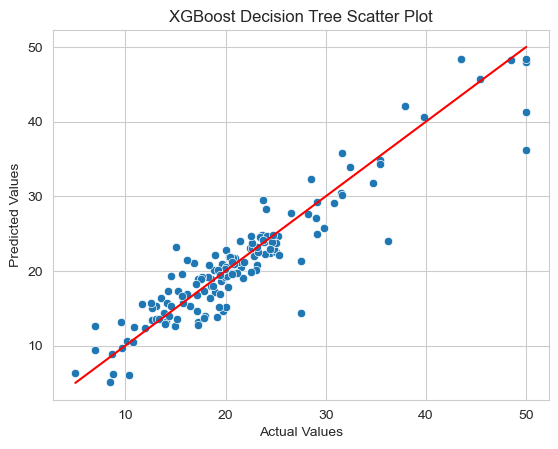

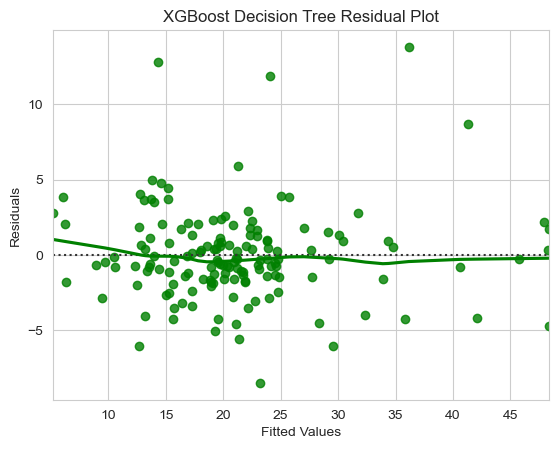

In [32]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Decision Tree Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Decision Tree Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Random Forest from XGBoost library

In [33]:
import xgboost as xgb

# Set the hyperparameters for the XGBoost random forest
xgb_params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost random forest model
xgb_rf_clf = xgb.XGBRFRegressor(**xgb_params)
xgb_rf_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_rf_score = xgb_rf_clf.score(X_test, Y_test)
print(f"XGBoost Random Forest R-squared score on test data: {xgb_rf_score}")

# Compute the predicted target values for the test dataset using the trained XGBoost random forest model
Y_pred = xgb_rf_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost Random Forest MSE on test data: {mse:.2f}")
print(f"XGBoost Random Forest RMSE on test data: {rmse:.2f}")
print(f"XGBoost Random Forest MAE on test data: {mae:.2f}")

XGBoost Random Forest R-squared score on test data: 0.8762905229962191
XGBoost Random Forest MSE on test data: 9.22
XGBoost Random Forest RMSE on test data: 3.04
XGBoost Random Forest MAE on test data: 2.17


## Using K-fold cross validation 

In [34]:
# Define the cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost random forest model using cross-validation
xgb_rf_cv = xgb.XGBRFRegressor(**xgb_params)
cv_score = cross_val_score(xgb_rf_cv, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Random Forest Cross-Validation Scores:", cv_score)
print("Mean R-squared:", cv_score.mean())

XGBoost Random Forest Cross-Validation Scores: [0.81727106 0.67515349 0.8452846  0.82116256 0.89870366]
Mean R-squared: 0.811515073578325


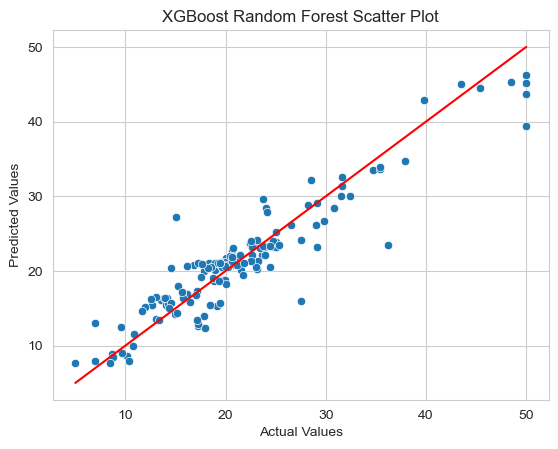

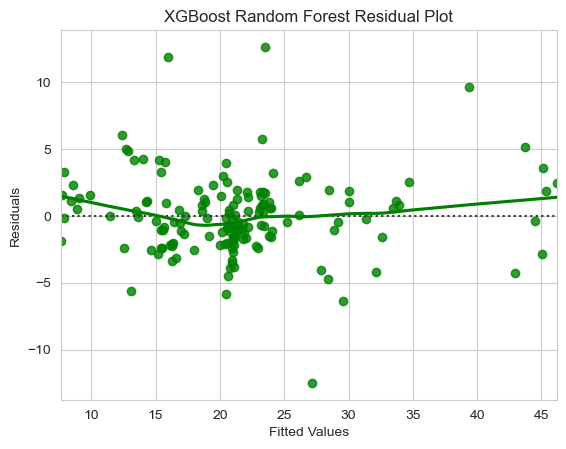

In [35]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Random Forest Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Random Forest Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## XGBoost from XGBoost library 

In [36]:
# Set the hyperparameters for the XGBoost model
xgb_params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost model
xgb_clf = xgb.XGBRegressor(**xgb_params)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_clf.fit(X_train, Y_train)

# Compute the predicted target values for the test dataset using the trained XGBoost model
xgb_score = xgb_clf.score(X_test, Y_test)

print(f"XGBoost R-squared score on test data: {xgb_score}")
Y_pred = xgb_clf.predict(X_test)

# Compute the mean squared error (MSE), RMSE, MAE of the model predictions
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost MSE on test data: {mse:.2f}")
print(f"XGBoost RMSE on test data: {rmse:.2f}")
print(f"XGBoost MAE on test data: {mae:.2f}")

XGBoost R-squared score on test data: 0.8710620378464169
XGBoost MSE on test data: 9.61
XGBoost RMSE on test data: 3.10
XGBoost MAE on test data: 2.10


## K-fold cross validation

In [37]:
# Define the cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost model using cross-validation
score = cross_val_score(xgb_clf, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Cross-Validation Scores:", score)
print("Mean R-squared:", score.mean())

XGBoost Cross-Validation Scores: [0.78471319 0.72913184 0.85543    0.88052288 0.86630768]
Mean R-squared: 0.8232211166221134


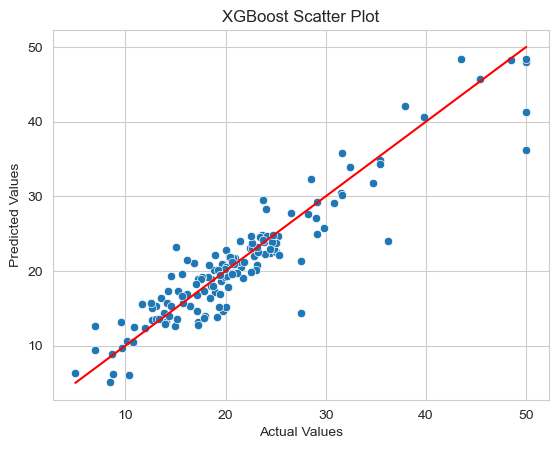

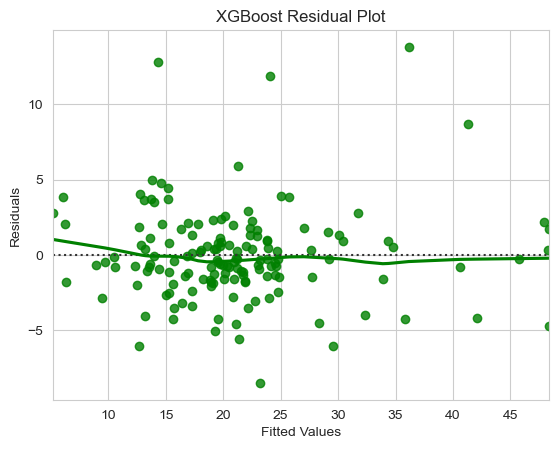

In [38]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [39]:
# RandomsearchCV is used for 2 different techniques 
def find_best_model_using_randomsearchcv(X, Y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150, 200],
                'max_features': ['sqrt', 'log2'],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.05, 0.1, 0.15, 0.2],
                'max_depth': [3, 4, 5, 6],
                'n_estimators': [50, 100, 150, 200],
                'objective': ['reg:squarederror']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=5, random_state=0, return_train_score=False)
        rs.fit(X,Y)
        mean_test_score = np.mean(rs.cv_results_['mean_test_score'])
        print(f"{algo_name} Mean Cross-Validation Score: {mean_test_score:.2f}")
        Y_pred = rs.predict(X)
        r_squared = rs.best_score_
        mse = mean_squared_error(Y, Y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(Y, Y_pred)
        #print(f"{algo_name} Cross-Validation Score: {r_squared:.2f}")
        print(f"{algo_name} Cross-Validation Scores: {rs.cv_results_['mean_test_score']}")
        scores.append({
            'model': algo_name,
            'best_score': r_squared,
            'best_params': rs.best_params_,
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'mse', 'rmse', 'mae'])

    
find_best_model_using_randomsearchcv(X, Y)


random_forest Mean Cross-Validation Score: 0.77
random_forest Cross-Validation Scores: [0.77523226 0.79831367 0.76795667 0.74157862 0.74760264]
xgboost Mean Cross-Validation Score: 0.83
xgboost Cross-Validation Scores: [0.82694524 0.82141411 0.82529979 0.82639922 0.83869846]


,model,best_score,best_params,mse,rmse,mae
0,random_forest,0.798314,"{'n_estimators': 150, 'min_samples_split': 2, ...",1.494267,1.222402,0.794124
1,xgboost,0.838698,"{'objective': 'reg:squarederror', 'n_estimator...",0.883734,0.940071,0.720922


random_forest Mean Cross-Validation Score: 0.77
random_forest Cross-Validation Scores: [0.77843892 0.79121108 0.76169419 0.75017011 0.74824879]
xgboost Mean Cross-Validation Score: 0.83
xgboost Cross-Validation Scores: [0.82694524 0.82141411 0.82529979 0.82639922 0.83869846]


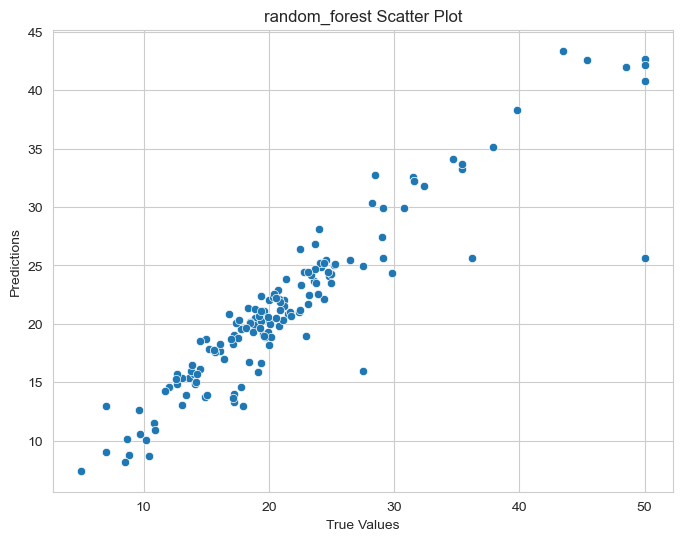

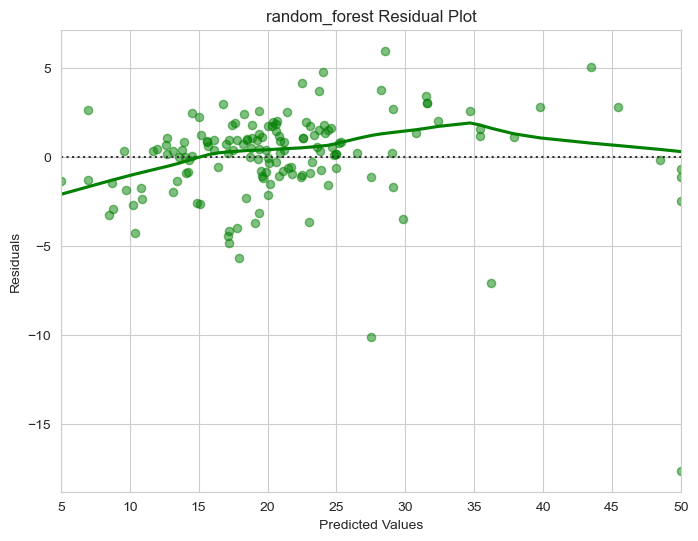

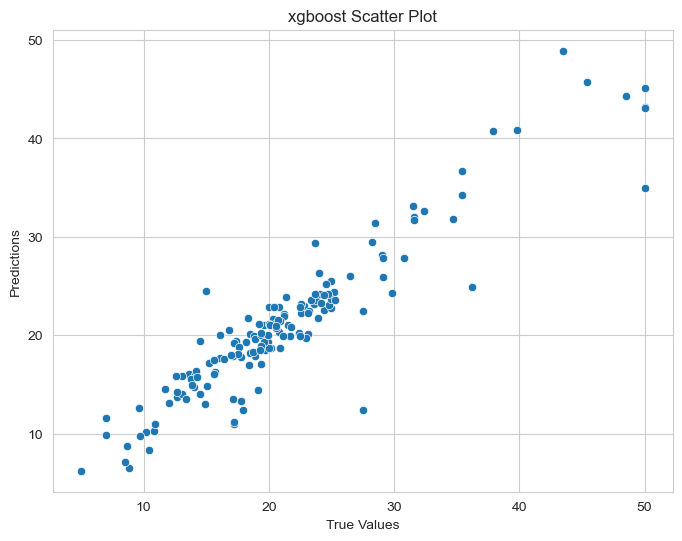

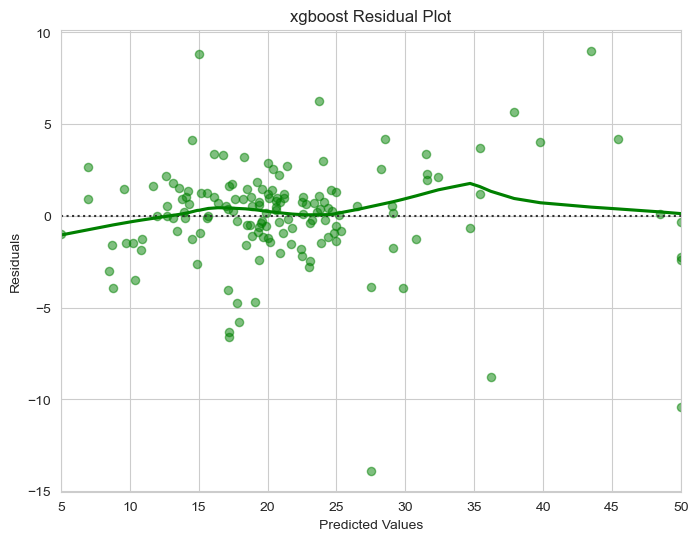

In [40]:
# define a function to create scatter plots
def scatter_plot(Y_test, Y_pred, title):
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x=Y_test, y=Y_pred)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.set_title(title)
    plt.show()

# define a function to create residual plots
def residual_plot(Y_test, Y_pred, title):
    plt.figure(figsize=(8, 6))
    ax = sns.residplot(x=Y_test, y=Y_pred, lowess=True,color="g",scatter_kws={'s': 35, 'alpha': 0.5})
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(title)
    plt.show()

# get the best models using RandomizedSearchCV
best_models = find_best_model_using_randomsearchcv(X, Y)

# loop through the best models and generate scatter and residual plots
for _, row in best_models.iterrows():
    model_name = row['model']
    best_params = row['best_params']
    
    if model_name == 'random_forest':
        model = RandomForestRegressor(**best_params)
    elif model_name == 'xgboost':
        model = XGBRegressor(**best_params)
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    scatter_plot(Y_test, Y_pred, f"{model_name} Scatter Plot")
    residual_plot(Y_test, Y_pred, f"{model_name} Residual Plot")
